In [ ]:
import pandas as pd
import numpy as np

In [15]:
from models.dynamic_models.single_step import single_step_area
from models.dynamic_models.visuializer import show_facility_location

#data constants
distances = pd.read_csv("data/ermera_full/processed/distances.csv").drop(columns=["Unnamed: 0"])
homes = pd.read_csv("data/ermera_full/processed/populations.csv").drop(columns=["Unnamed: 0"])
locations = pd.read_csv("data/ermera_full/processed/facilities.csv").drop(columns=["Unnamed: 0"])
periods_df = pd.DataFrame([1,2,3,4])
periods = periods_df[0]
per_period = 2
max_distance = 3
open_facilities = locations["is_built"]
vpop = homes["Population"]

xC = homes['Pop_Lon']
yC = homes['Pop_Lat']
xF = locations['Grid_Lon']
yF = locations['Grid_Lat']

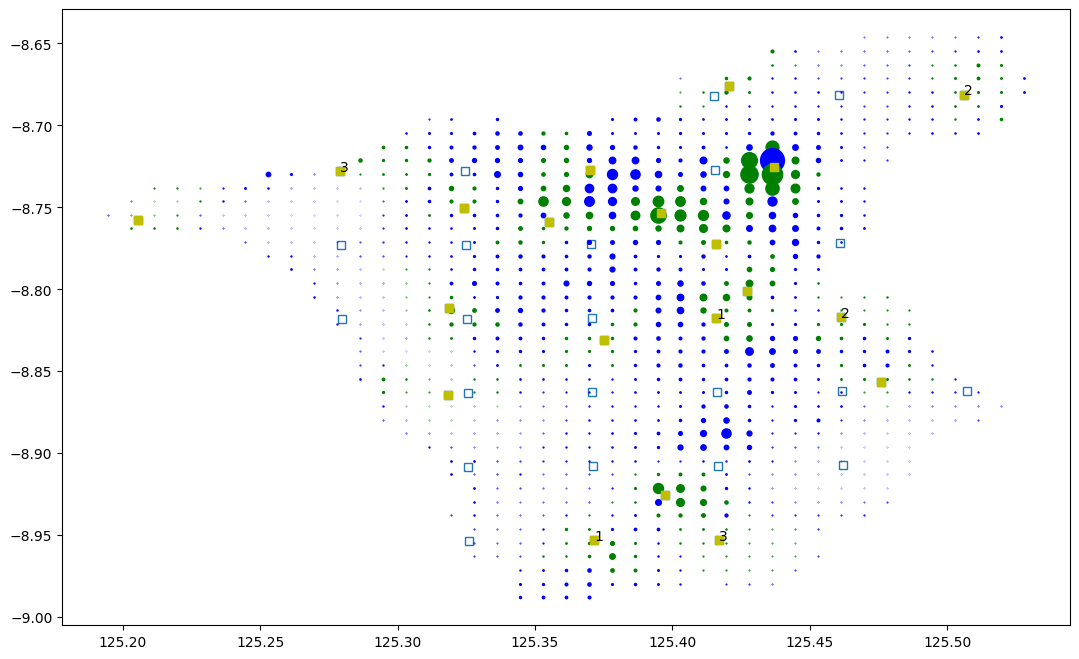

In [20]:
Z, X, building = single_step_area(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)
Z_constrained, X_constrained, constrained_curve = two_step_constrained(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)
Z_pareto, X_pareto, pareto_curve = get_pareto_curve(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

show_facility_location(xC, yC, xF, yF, X=X_constrained, Z=Z_constrained, homes=homes, locations=locations, periods=periods, vpop=vpop)

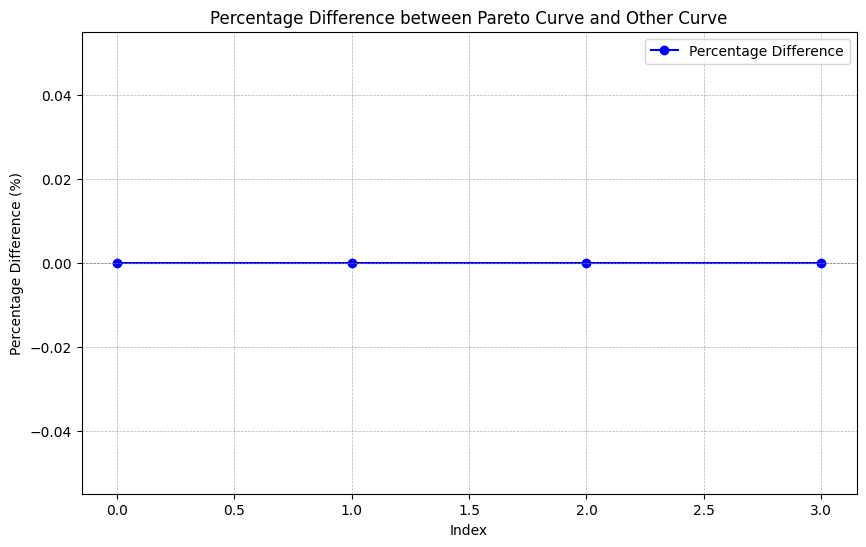

In [19]:
pareto_curve = pareto_curve
other_curve = building

plot_percentage_difference(pareto_curve, other_curve)

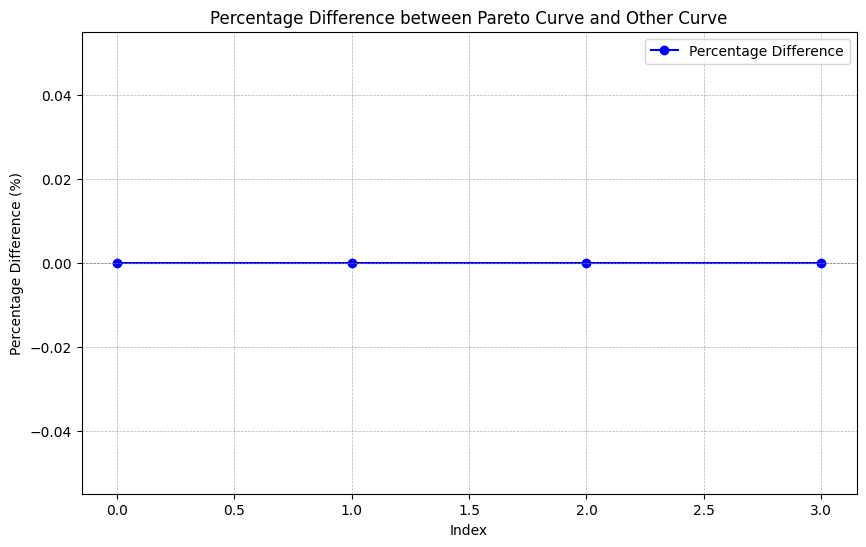

In [21]:
pareto_curve = pareto_curve
other_curve = constrained_curve

plot_percentage_difference(pareto_curve, other_curve)

# Facilities (1000) == Households (1000)

In [2]:
from utils.create_data import generate_facility_location_instance
service, customers, facilities = generate_facility_location_instance(1000, 1000, 20)

xC = customers['Pop_Lon']
yC = customers['Pop_Lat']
xF = facilities['Grid_Lon']
yF = facilities['Grid_Lat']

In [3]:
distances = service
homes = customers
locations = facilities
periods_df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
periods = periods_df[0]
per_period = 2
max_distance = 1
open_facilities = facilities["is_built"]
vpop = customers["population"]

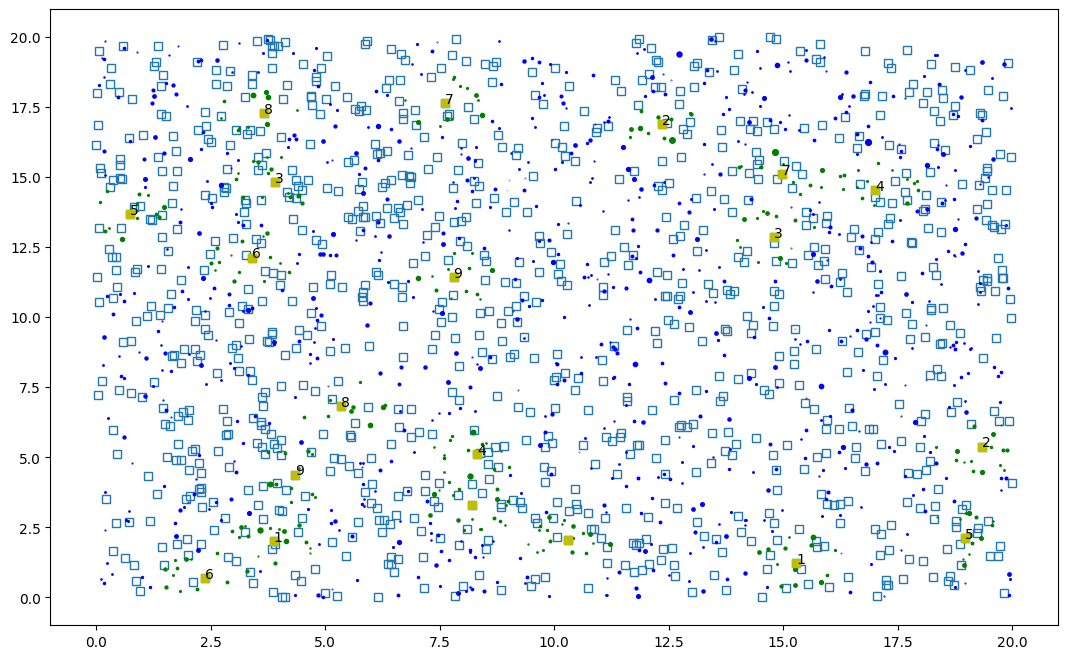

In [4]:
from models.dynamic_models.single_step import single_step_area
from models.dynamic_models.visuializer import show_facility_location

Z, X, building = single_step_area(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

show_facility_location(xC, 
                       yC, 
                       xF, 
                       yF, 
                       X=X, 
                       Z=Z, 
                       homes=homes, 
                       locations=locations, 
                       periods=periods, 
                       vpop=vpop)

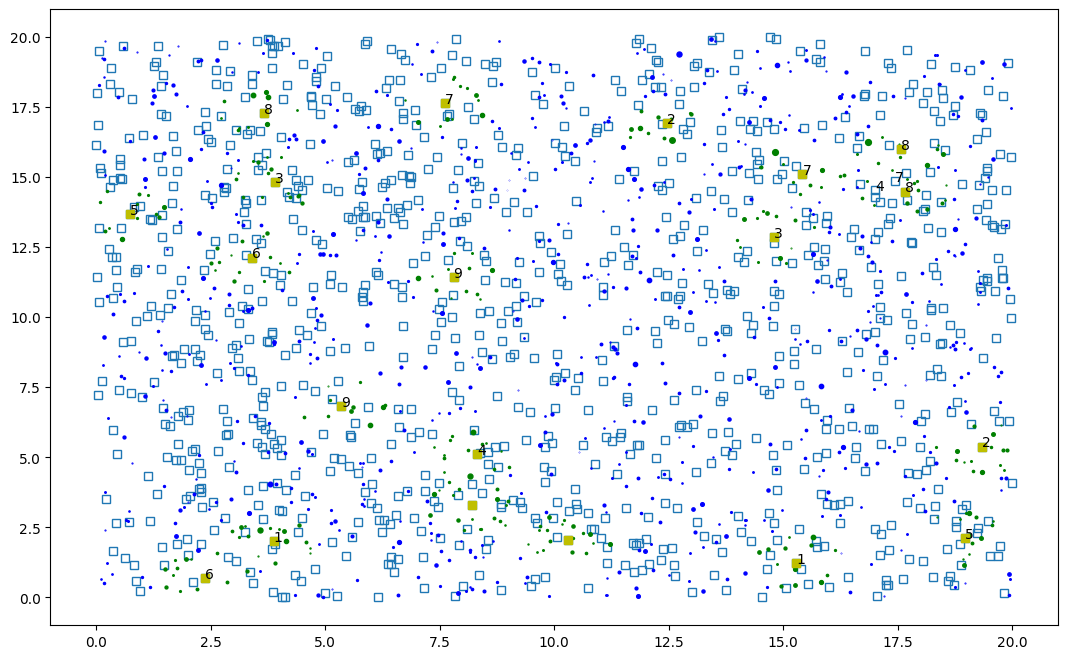

In [5]:
from models.dynamic_models.pareto import get_pareto_curve

Z_pareto, X_pareto, pareto_curve = get_pareto_curve(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

show_facility_location(xC, 
                       yC, 
                       xF, 
                       yF, 
                       X=X_pareto, 
                       Z=Z_pareto, 
                       homes=homes, 
                       locations=locations, 
                       periods=periods, 
                       vpop=vpop)

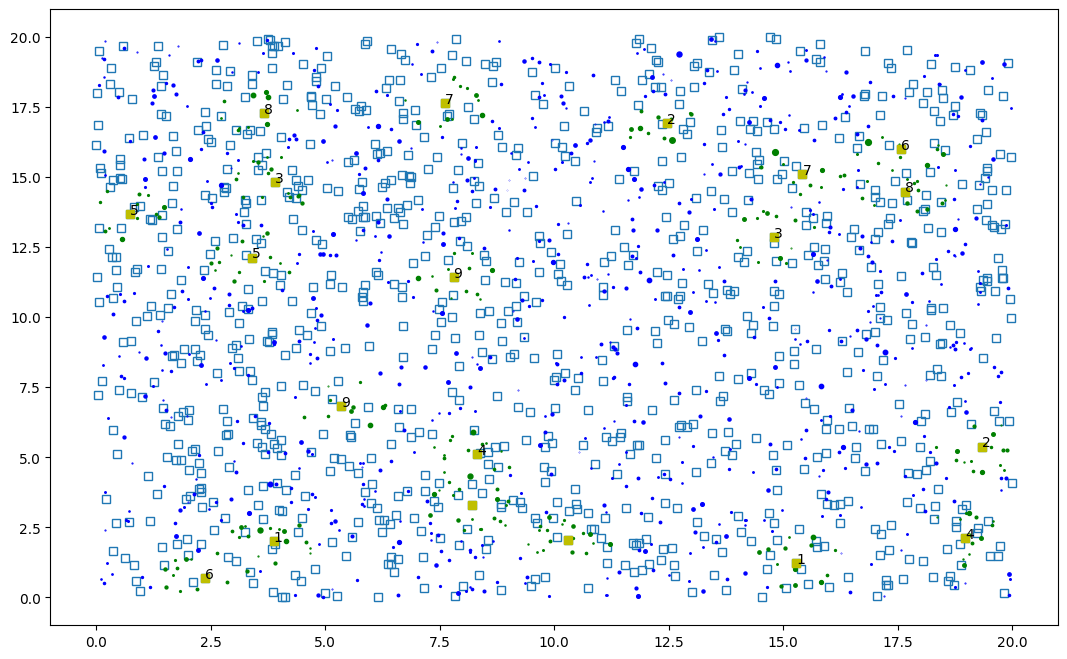

In [6]:
from models.dynamic_models.two_step_constrained import two_step_constrained

Z_constrained, X_constrained, constrained_curve = two_step_constrained(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

show_facility_location(xC, 
                       yC, 
                       xF, 
                       yF, 
                       X=X_constrained, 
                       Z=Z_constrained, 
                       homes=homes, 
                       locations=locations, 
                       periods=periods, 
                       vpop=vpop)

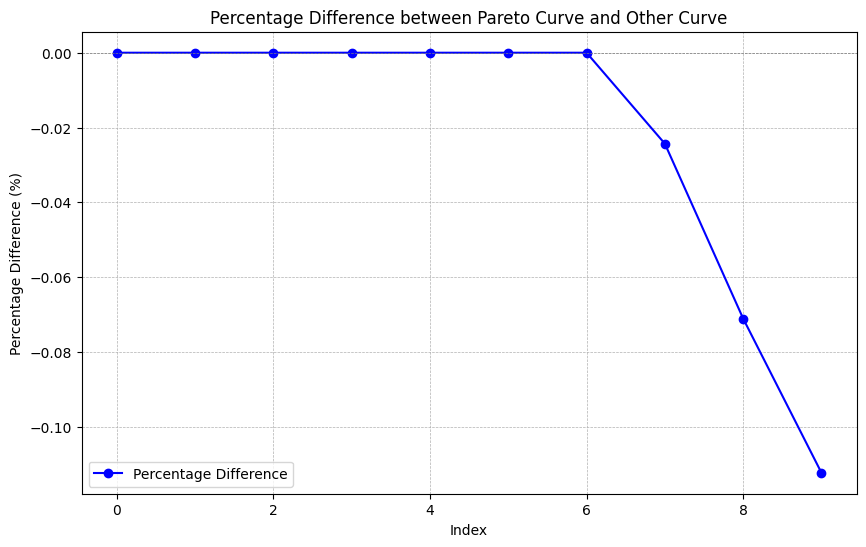

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot percentage difference between two sets of solutions
def plot_percentage_difference(pareto_curve, other_curve):
    # Ensure both curves have the same length
    if len(pareto_curve) != len(other_curve):
        raise ValueError("Curves must have the same length")

    # Calculate the percentage difference
    percentage_difference = [(other_curve[i] - pareto_curve[i]) / pareto_curve[i] * 100 for i in range(len(pareto_curve))]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_difference, linestyle='-', marker='o', color='b', label='Percentage Difference')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Horizontal line at zero
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines
    plt.title("Percentage Difference between Pareto Curve and Other Curve")
    plt.xlabel("Index")
    plt.ylabel("Percentage Difference (%)")
    plt.legend() 
    plt.show() 

pareto_curve = pareto_curve
other_curve = building

plot_percentage_difference(pareto_curve, other_curve)


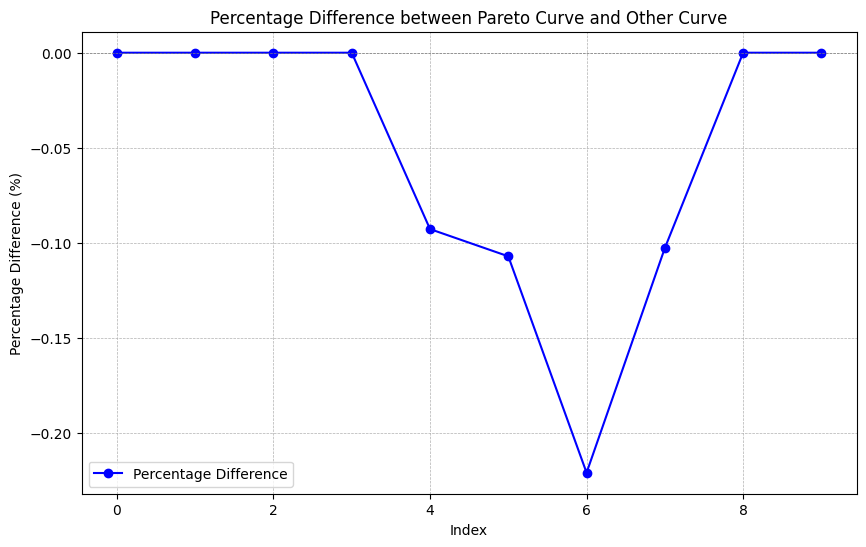

In [12]:
pareto_curve = pareto_curve
other_curve = constrained_curve

plot_percentage_difference(pareto_curve, other_curve)

# Facilities (100) < Households (10000)

In [22]:
service, customers, facilities = generate_facility_location_instance(100, 10000, 20)

xC = customers['Pop_Lon']
yC = customers['Pop_Lat']
xF = facilities['Grid_Lon']
yF = facilities['Grid_Lat']

distances = service
homes = customers
locations = facilities
periods_df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
periods = periods_df[0]
per_period = 2
max_distance = 1
open_facilities = facilities["is_built"]
vpop = customers["population"]

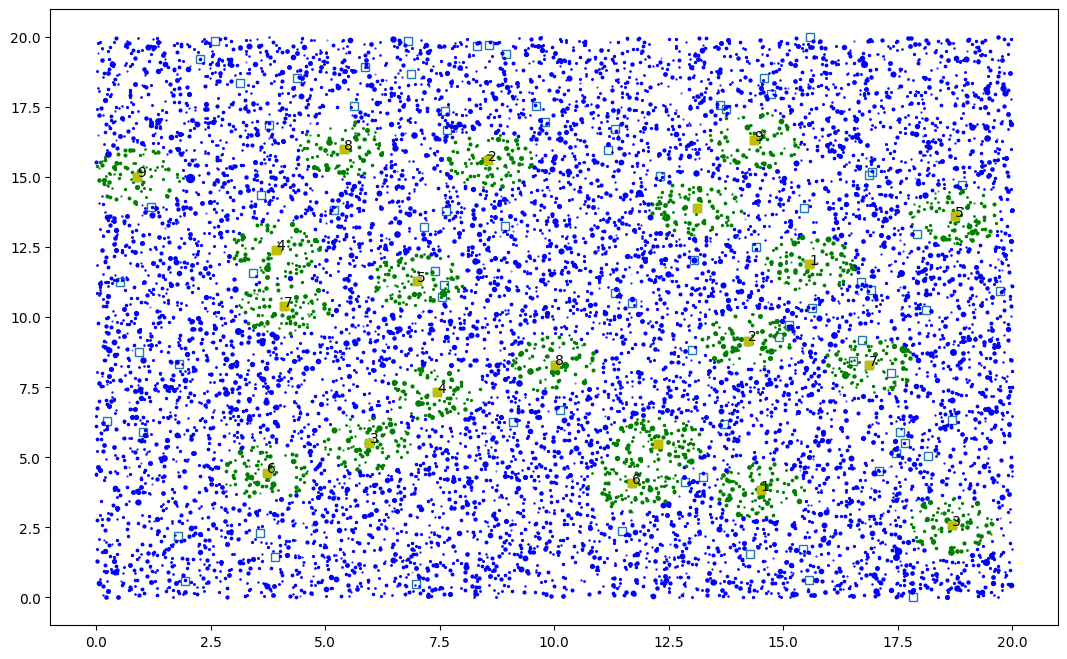

In [23]:
Z, X, building = single_step_area(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

show_facility_location(xC, 
                       yC, 
                       xF, 
                       yF, 
                       X=X, 
                       Z=Z, 
                       homes=homes, 
                       locations=locations, 
                       periods=periods, 
                       vpop=vpop)

In [24]:
Z_pareto, X_pareto, pareto_curve = get_pareto_curve(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

In [25]:
Z_constrained, X_constrained, constrained_curve = two_step_constrained(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

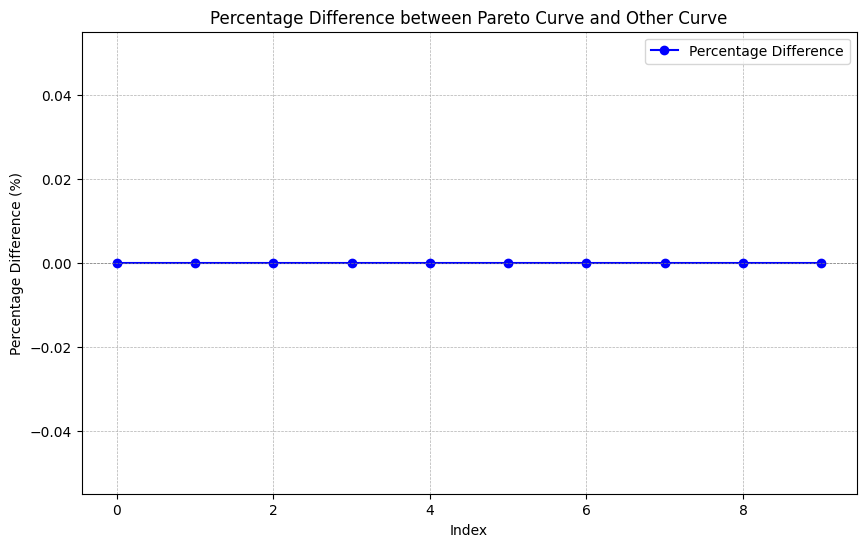

In [26]:
pareto_curve = pareto_curve
other_curve = building

plot_percentage_difference(pareto_curve, other_curve)

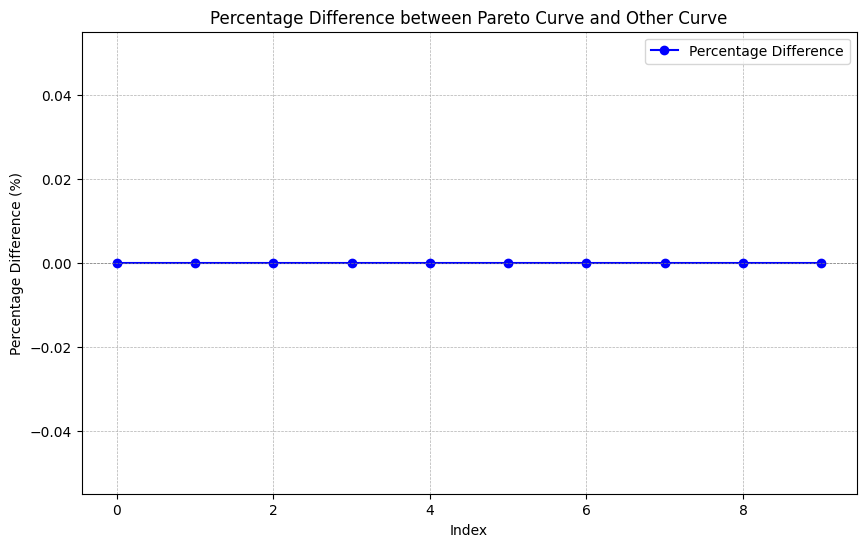

In [27]:
pareto_curve = pareto_curve
other_curve = constrained_curve

plot_percentage_difference(pareto_curve, other_curve)

In [28]:
service, customers, facilities = generate_facility_location_instance(10000, 100, 20)

xC = customers['Pop_Lon']
yC = customers['Pop_Lat']
xF = facilities['Grid_Lon']
yF = facilities['Grid_Lat']

distances = service
homes = customers
locations = facilities
periods_df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
periods = periods_df[0]
per_period = 2
max_distance = 1
open_facilities = facilities["is_built"]
vpop = customers["population"]

# Facilities (10000) > households (100)

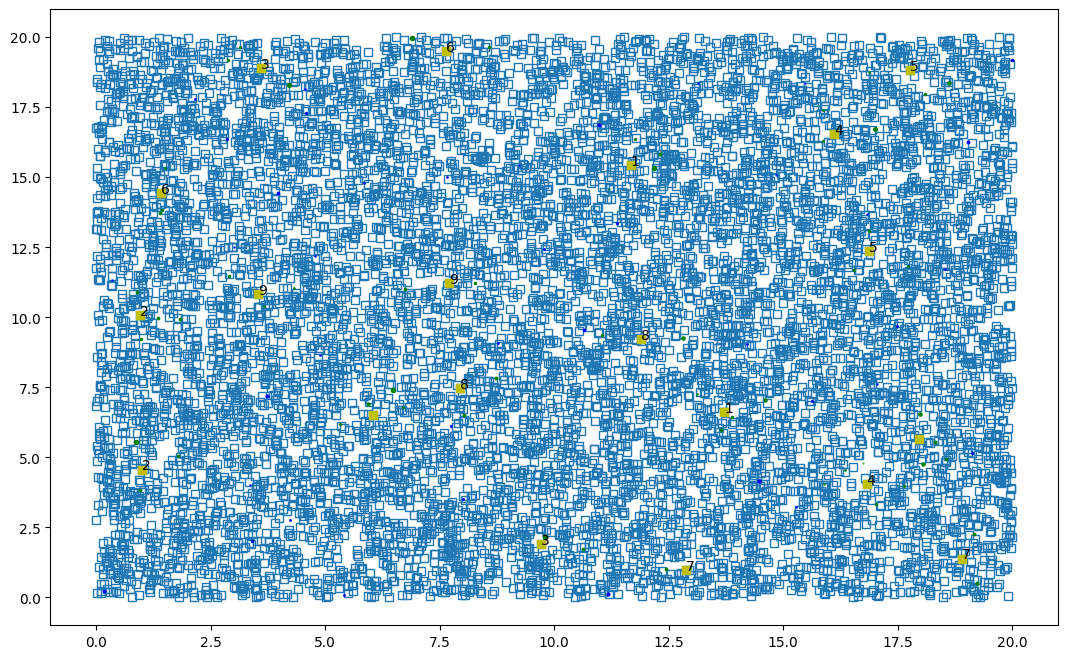

In [29]:
Z, X, building = single_step_area(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

show_facility_location(xC, 
                       yC, 
                       xF, 
                       yF, 
                       X=X, 
                       Z=Z, 
                       homes=homes, 
                       locations=locations, 
                       periods=periods, 
                       vpop=vpop)

In [30]:
Z_pareto, X_pareto, pareto_curve = get_pareto_curve(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

In [31]:
Z_constrained, X_constrained, constrained_curve = two_step_constrained(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

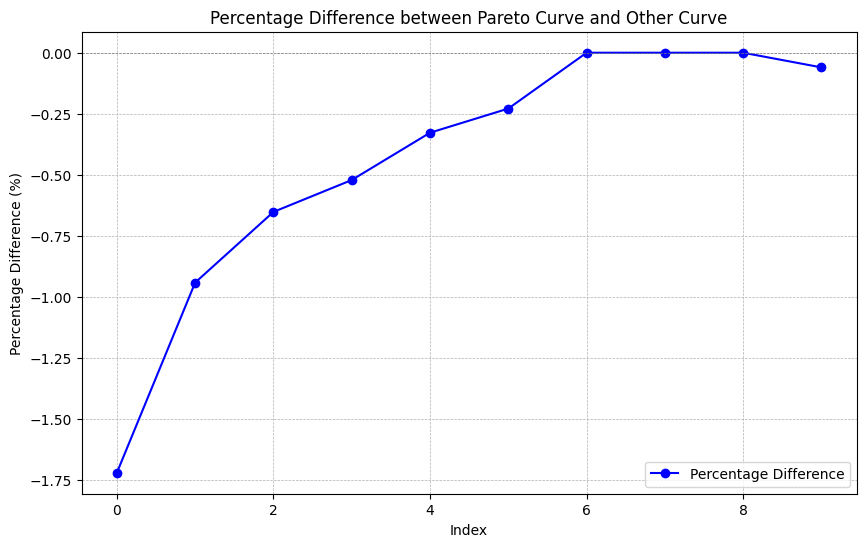

In [32]:
pareto_curve = pareto_curve
other_curve = building

plot_percentage_difference(pareto_curve, other_curve)

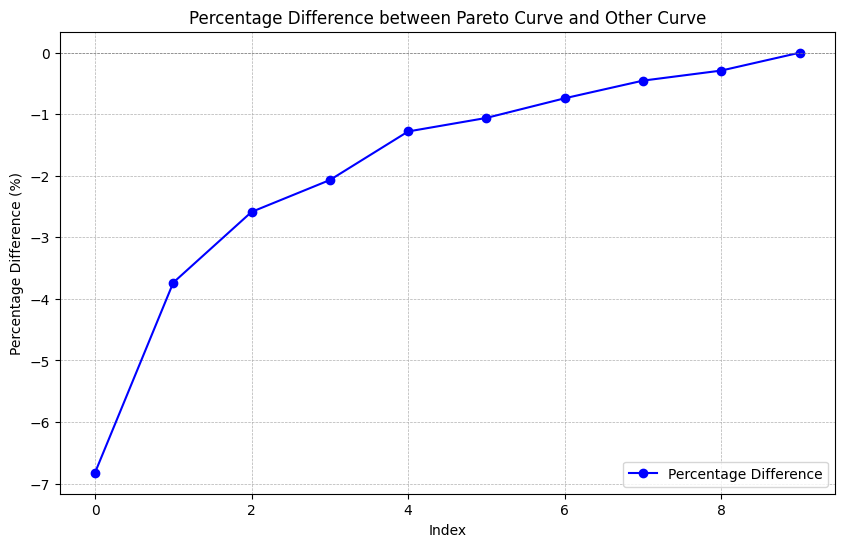

In [33]:
pareto_curve = pareto_curve
other_curve = constrained_curve

plot_percentage_difference(pareto_curve, other_curve)